In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///F:/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.shape

(395, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

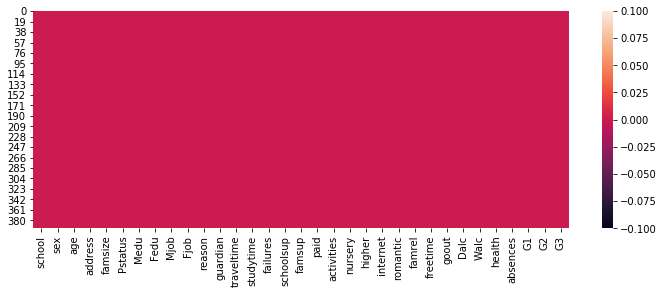

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull())

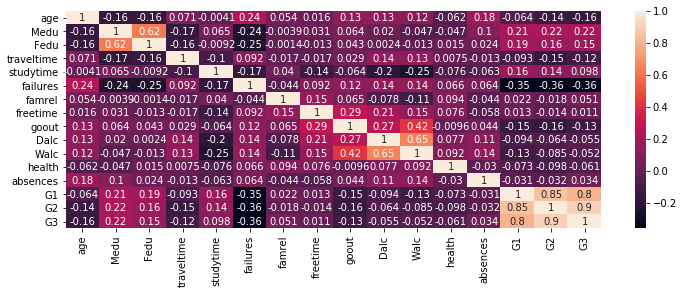

In [11]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

In [19]:
x = df[['G1', 'G2','studytime', 'failures', 'absences']]  
y = df['G3']

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [27]:
li=LogisticRegression()
li.fit(xtrain,ytrain)
pred_l = li.predict(xtest)
acc_l = accuracy_score(ytest , pred_l)*100
acc_l

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


33.61344537815126

In [29]:
lo=LinearRegression()
lo.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lo.score(xtest,ytest)

0.7416969228092731

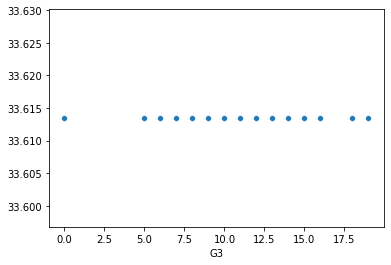

In [31]:
sns.scatterplot(ytest,acc_l)

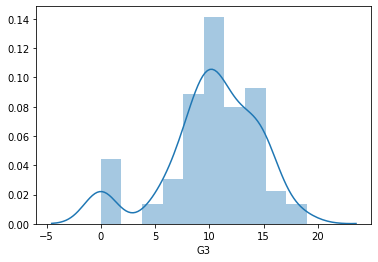

In [33]:
sns.distplot(ytest)

In [34]:
from sklearn.metrics import r2_score

In [37]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_l)*100
accu_tre

33.61344537815126

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)
pred_rdf=rdf.predict(xtest)
accu_l=accuracy_score(ytest,pred_rdf)
accu_l

0.44537815126050423

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
mul=MultinomialNB()
mul.fit(xtrain,ytrain)
pred_mul=mul.predict(xtest)
accu_l=accuracy_score(ytest,pred_mul)
accu_l

0.25210084033613445

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)
accu_l

0.44537815126050423

In [45]:
from sklearn.naive_bayes import BernoulliNB


In [46]:
ber=BernoulliNB()
ber.fit(xtrain,ytrain)
pre_ber=ber.predict(xtest)
accu_l=accuracy_score(ytest,pre_ber)
accu_l

0.14285714285714285

In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)
accu_l

0.33613445378151263

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)
pre_fit=rdf.predict(xtest)
accu_l=accuracy_score(ytest,pre_fit)
accu_l

0.453781512605042

In [51]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


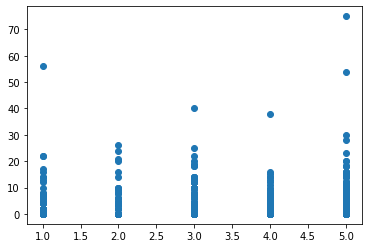

In [52]:
plt.scatter(df[['health']],df['absences'])

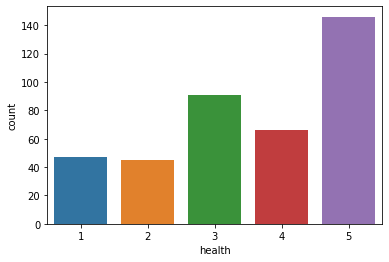

In [56]:
sns.countplot(df['health'])

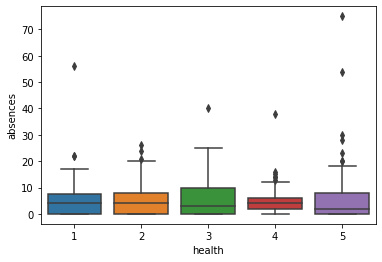

In [58]:
sns.boxplot(df['health'],df['absences'])

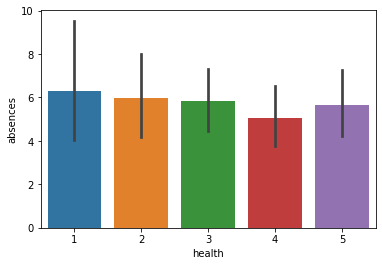

In [59]:
sns.barplot(df['health'],df['absences'])

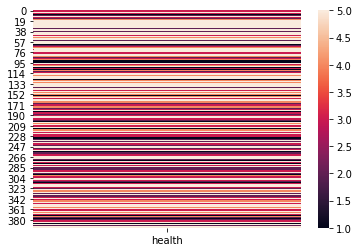

In [60]:
sns.heatmap(df[['health']])

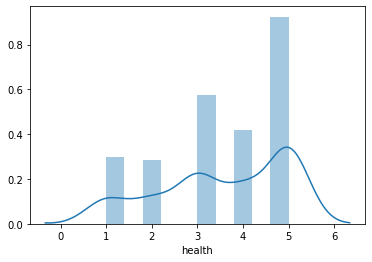

In [81]:
sns.distplot(df['health'],bins=10)

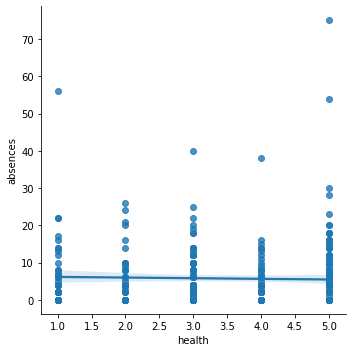

In [65]:
sns.lmplot(x='health',y='absences',data=df)

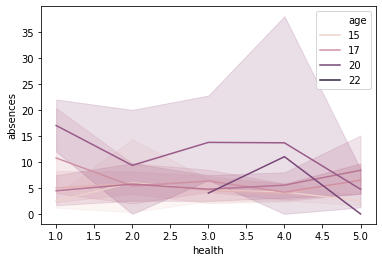

In [78]:
sns.lineplot(x='health',y='absences',data=df,hue='age')

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


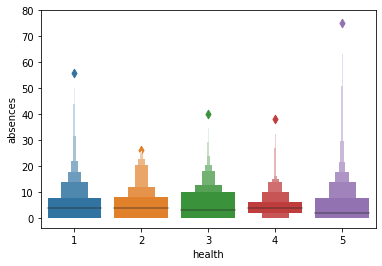

In [76]:
sns.lvplot(x='health',y='absences',data=df)

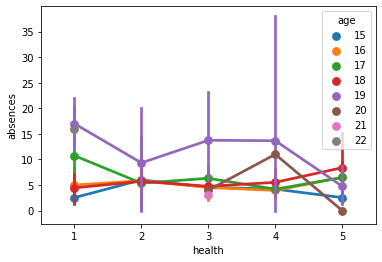

In [75]:
sns.pointplot(x='health',y='absences',data=df,hue='age')

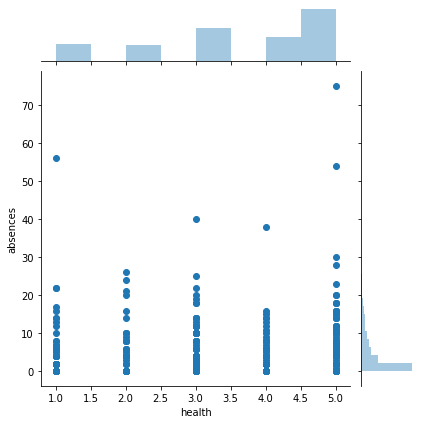

In [73]:
sns.jointplot(x='health',y='absences',data=df)

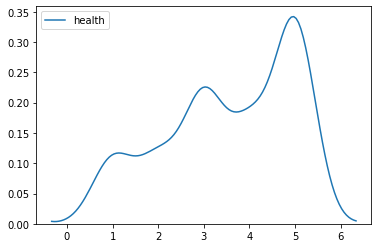

In [72]:
sns.kdeplot(df['health'])